# Prob 1.1

In [2]:
#Import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules


# Prob 1.2

In [3]:
df = pd.read_csv('./dataset.csv',sep=',')
df.head(10)
print(df.head(10))
items = df['0'].unique()
print(type(items))
for  i in items:
    print(i)

        0       1       2       3       4       5       6
0   Bread    Wine    Eggs    Meat  Cheese  Pencil  Diaper
1   Bread  Cheese    Meat  Diaper    Wine    Milk  Pencil
2  Cheese    Meat    Eggs    Milk    Wine     NaN     NaN
3  Cheese    Meat    Eggs    Milk    Wine     NaN     NaN
4    Meat  Pencil    Wine     NaN     NaN     NaN     NaN
5    Eggs   Bread    Wine  Pencil    Milk  Diaper   Bagel
6    Wine  Pencil    Eggs  Cheese     NaN     NaN     NaN
7   Bagel   Bread    Milk  Pencil  Diaper     NaN     NaN
8   Bread  Diaper  Cheese    Milk    Wine    Eggs     NaN
9   Bagel    Wine  Diaper    Meat  Pencil    Eggs  Cheese
<class 'numpy.ndarray'>
Bread
Cheese
Meat
Eggs
Wine
Bagel
Pencil
Diaper
Milk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


In [5]:
itemset = set(items)
envals = []
for idx, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncomms = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    print(uncomms)
    print(commons)
    print("-------------")
    for uc in uncomms:
        labels[uc] = 0
    for cm in commons:
        labels[cm] = 1
    envals.append(labels)

['Bagel', 'Milk']
['Eggs', 'Pencil', 'Cheese', 'Bread', 'Meat', 'Diaper', 'Wine']
-------------
['Eggs', 'Bagel']
['Pencil', 'Cheese', 'Bread', 'Meat', 'Diaper', 'Wine', 'Milk']
-------------
['Diaper', 'Bagel', 'Bread', 'Pencil']
['Eggs', 'Cheese', 'Meat', 'Wine', 'Milk']
-------------
['Diaper', 'Bagel', 'Bread', 'Pencil']
['Eggs', 'Cheese', 'Meat', 'Wine', 'Milk']
-------------
['Eggs', 'Bagel', 'Cheese', 'Bread', 'Diaper', 'Milk']
['Meat', 'Wine', 'Pencil']
-------------
['Cheese', 'Meat']
['Eggs', 'Pencil', 'Bagel', 'Bread', 'Diaper', 'Wine', 'Milk']
-------------
['Bagel', 'Bread', 'Meat', 'Diaper', 'Milk']
['Eggs', 'Wine', 'Cheese', 'Pencil']
-------------
['Eggs', 'Meat', 'Cheese', 'Wine']
['Pencil', 'Bagel', 'Bread', 'Diaper', 'Milk']
-------------
['Bagel', 'Meat', 'Pencil']
['Eggs', 'Cheese', 'Bread', 'Diaper', 'Wine', 'Milk']
-------------
['Bread', 'Milk']
['Eggs', 'Pencil', 'Bagel', 'Cheese', 'Meat', 'Diaper', 'Wine']
-------------
['Diaper', 'Bagel', 'Bread', 'Pencil']
[

In [6]:
#apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)


In [7]:
#association_rules(df, metric='confidence', min_threshold=0,8, support_only=False)

In [8]:
ohedt = pd.DataFrame(envals)
fitems = apriori(ohedt, min_support=0.2, use_colnames=True, verbose=1)
fitems

Processing 141 combinations | Sampling itemset size 3


/home/dat/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.438095,(Eggs)
3,0.361905,(Pencil)
4,0.501587,(Cheese)
5,0.504762,(Bread)
6,0.476190,(Meat)
7,0.406349,(Diaper)
8,0.438095,(Wine)
9,0.225397,"(Bagel, Milk)"


In [9]:
rules = association_rules(fitems, metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
4,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
5,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
6,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
7,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
8,"(Cheese, Meat)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845
9,"(Cheese, Milk)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429


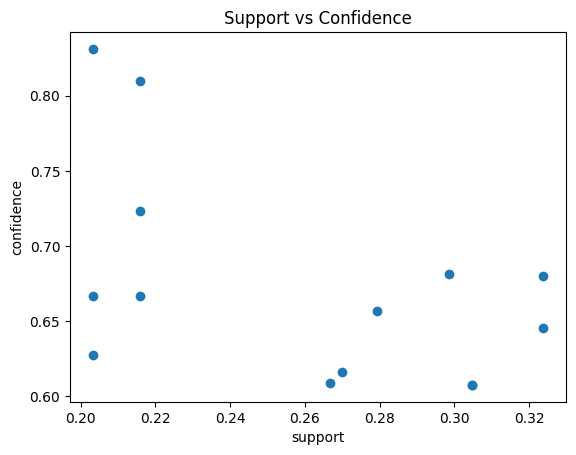

In [10]:
plt.scatter(rules['support'],rules['confidence'], alpha=1)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()